In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [4]:
X,Y=make_blobs(n_samples=1000 ,centers=3 ,n_features=2)

In [5]:
X

array([[-2.94413897,  1.02220888],
       [-0.78274954, -4.63330815],
       [-2.21604577, -3.40016813],
       ...,
       [-1.05801999, -6.2522473 ],
       [-1.60103757, -1.14627513],
       [-0.37460689,  6.20516455]])

In [6]:
Y

array([0, 1, 1, 1, 0, 2, 0, 0, 2, 1, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 0,
       0, 0, 2, 1, 0, 1, 1, 2, 1, 1, 1, 0, 1, 2, 0, 0, 1, 1, 1, 2, 2, 0,
       0, 0, 1, 0, 0, 2, 2, 1, 1, 2, 2, 0, 1, 1, 0, 2, 1, 2, 0, 0, 1, 1,
       1, 1, 0, 2, 1, 2, 1, 0, 1, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 2, 1, 0, 2, 0, 2, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 2, 2,
       0, 2, 1, 2, 2, 0, 0, 0, 0, 1, 1, 2, 1, 0, 1, 2, 1, 2, 1, 1, 0, 2,
       2, 2, 0, 1, 1, 1, 2, 2, 1, 0, 0, 0, 1, 2, 2, 1, 0, 0, 2, 0, 2, 2,
       2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 2, 2, 1, 2, 1, 0, 0, 2, 2, 1, 2,
       1, 1, 2, 2, 0, 1, 1, 0, 0, 0, 1, 2, 2, 2, 2, 1, 0, 0, 2, 2, 2, 1,
       2, 2, 1, 1, 2, 2, 1, 1, 2, 0, 1, 1, 2, 0, 0, 2, 1, 2, 1, 1, 2, 2,
       1, 1, 0, 0, 1, 2, 1, 0, 2, 1, 0, 0, 1, 2, 1, 2, 0, 2, 2, 2, 0, 2,
       2, 0, 0, 1, 0, 2, 0, 2, 2, 0, 0, 2, 2, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       2, 2, 0, 1, 2, 0, 2, 2, 1, 2, 2, 0, 0, 1, 1, 1, 1, 2, 2, 0, 0, 1,
       2, 0, 0, 1, 0, 0, 1, 1, 0, 2, 1, 0, 2, 1, 2,

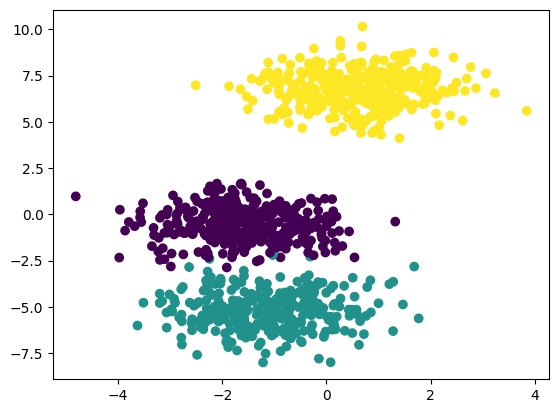

In [8]:
plt.scatter(X[:,0],X[:,1],c=Y)

In [13]:
## Stndardization---feature scaler technique
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [15]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.33, random_state=42)

In [20]:
X_train_scale=scaler.fit(X_train)
X_test_split=scaler.transform(X_test)

In [21]:
from sklearn.cluster import KMeans

In [25]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [26]:
# Elbow method

wcss=[]
for k in range(1,11):
  kmeans=KMeans(n_clusters=k ,init="k-means++")
  kmeans.fit(X_train_scaled)
  wcss.append(kmeans.inertia_)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

In [27]:
wcss


[1339.9999999999989,
 497.4161976462509,
 329.6905998081127,
 256.3816440860242,
 191.32747872424127,
 153.01812349467835,
 128.56314704694674,
 107.99798058739871,
 87.9310614830331,
 77.98568047000178]

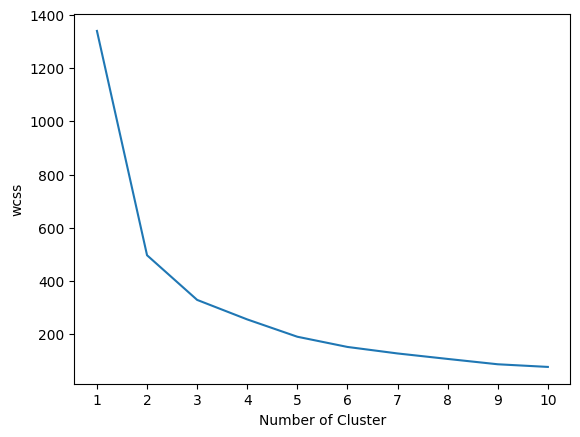

In [28]:
## plot elbow curve

plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Cluster")
plt.ylabel("wcss")
plt.show()


In [29]:
kmeans=KMeans(n_clusters=3 ,init="k-means++")

In [30]:
kmeans.fit_predict(X_train_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 0, 1, 0, 0, 0, 0, 1, 1, 2, 2, 2, 1, 1, 1, 2, 0, 1, 2, 2, 0, 1,
       2, 1, 0, 1, 1, 0, 2, 2, 1, 0, 0, 1, 0, 2, 0, 2, 0, 0, 2, 1, 2, 1,
       2, 1, 0, 2, 0, 2, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       2, 0, 2, 2, 1, 2, 1, 2, 1, 2, 0, 0, 0, 1, 0, 2, 0, 1, 0, 0, 1, 2,
       2, 0, 1, 0, 0, 1, 0, 0, 2, 1, 1, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 1,
       0, 0, 0, 0, 1, 2, 1, 2, 2, 2, 1, 1, 1, 0, 0, 0, 2, 2, 0, 2, 0, 1,
       1, 0, 2, 2, 1, 0, 2, 1, 0, 2, 1, 0, 1, 1, 0, 0, 2, 0, 1, 1, 1, 2,
       1, 2, 1, 0, 2, 1, 0, 2, 0, 2, 2, 1, 0, 2, 0, 1, 0, 0, 2, 0, 2, 2,
       0, 1, 1, 0, 2, 2, 0, 1, 0, 1, 0, 1, 2, 2, 1, 1, 0, 2, 2, 1, 1, 1,
       0, 2, 1, 2, 2, 2, 1, 0, 1, 1, 0, 2, 1, 1, 0, 1, 0, 0, 2, 2, 2, 2,
       2, 1, 2, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 2, 1, 0, 0,
       2, 1, 2, 1, 0, 0, 2, 1, 0, 1, 0, 1, 0, 0, 2, 0, 0, 1, 2, 2, 2, 2,
       1, 1, 0, 2, 1, 1, 1, 1, 0, 0, 2, 0, 1, 0, 0, 2, 0, 2, 1, 1, 2, 0,
       0, 1, 0, 0, 2, 0, 2, 0, 1, 0, 0, 2, 2, 0, 2,

In [32]:
y_pred=kmeans.predict(X_test_scaled)

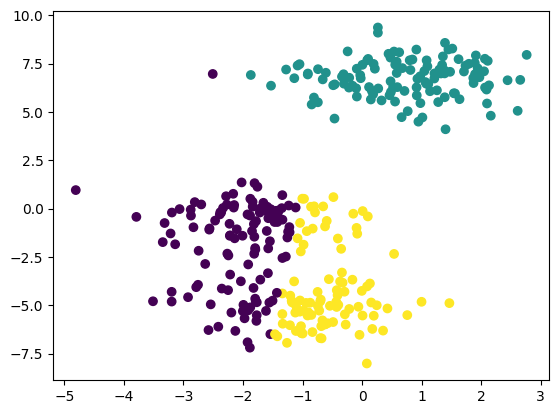

In [33]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)

In [34]:
# validating K value

# kneelocator
#Silhoutee scoring

In [36]:
#knee locator

! pip install kneed

In [37]:
from kneed import KneeLocator

In [38]:
kl=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")

In [39]:
kl.elbow

3

In [40]:
# silhoutte score
from sklearn.metrics import silhouette_score

In [43]:
silhouette_coefficient=[]
for k in range(2,11):
  kmeans=KMeans(n_clusters=k,init="k-means++")
  kmeans.fit(X_train_scaled)
  score=silhouette_score(X_train_scaled,kmeans.labels_)
  silhouette_coefficient.append(score)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

In [44]:
silhouette_coefficient


[0.5748142309513469,
 0.4558454716589539,
 0.41500873622570467,
 0.43064631035118905,
 0.43963771143273567,
 0.4425563534845812,
 0.4575834405746866,
 0.4457839044271449,
 0.4354054189860557]

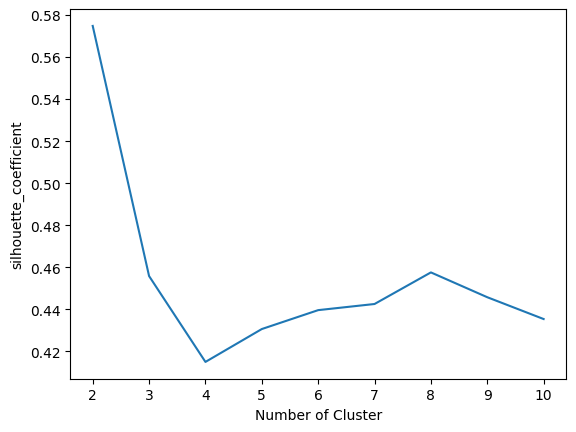

In [45]:
plt.plot(range(2,11),silhouette_coefficient)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluster")
plt.ylabel("silhouette_coefficient")
plt.show()